In [ ]:
import cv2   
import math   
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from keras.preprocessing import image 
import numpy as np 
from keras.utils import np_utils
from skimage.transform import resize 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/My Drive/Colab Notebooks/Tom&Jerry Classification/'

In [ ]:
count = 0
video = (base_dir+'Tom and jerry.mp4')
cap = cv2.VideoCapture(video)
frameRate = cap.get(5)
while(cap.isOpened()):
  frameId = cap.get(1) #current frame number
  ret, frame = cap.read()
  print(frameRate)
  if (ret != True):
    break
  if (frameId % math.floor(frameRate) == 0):
    filename = base_dir+"frame%d.jpg" % count;count+=1
    cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0
30.0


KeyboardInterrupt: ignored

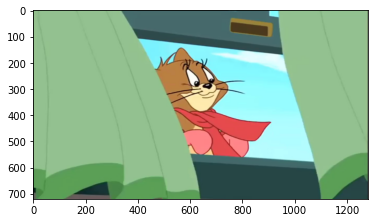

In [ ]:
img = plt.imread(base_dir+'frame0.jpg')   # reading image using its name
plt.imshow(img)

In [ ]:
data = pd.read_csv(base_dir+'mapping.csv')
data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [ ]:
X = [ ]
for img_name in data.Image_ID:
    img = plt.imread(base_dir + img_name)
    X.append(img)
X = np.array(X)

In [ ]:
y = data.Class
dummy_y = np_utils.to_categorical(y) 

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)
X[0].shape

(224, 224, 3)

In [ ]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape
X_train[0].shape

(7, 7, 512)

In [ ]:
X_train = X_train.reshape(208, 7*7*512)
X_valid = X_valid.reshape(90, 7*7*512)

In [ ]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax')) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              25691136  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 25,694,211
Trainable params: 25,694,211
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 1s 194ms/step - loss: 0.8717 - accuracy: 0.6394 - val_loss: 0.5751 - val_accuracy: 0.7889
Epoch 2/100
7/7 [==============================] - 1s 177ms/step - loss: 0.2889 - accuracy: 0.9135 - val_loss: 0.4324 - val_accuracy: 0.8556
Epoch 3/100
7/7 [==============================] - 1s 177ms/step - loss: 0.1412 - accuracy: 0.9663 - val_loss: 0.3292 - val_accuracy: 0.9000
Epoch 4/100
7/7 [==============================] - 1s 176ms/step - loss: 0.0670 - accuracy: 0.9952 - val_loss: 0.2897 - val_accuracy: 0.8889
Epoch 5/100
7/7 [==============================] - 1s 177ms/step - loss: 0.0462 - accuracy: 0.9952 - val_loss: 0.2960 - val_accuracy: 0.8778
Epoch 6/100
7/7 [==============================] - 1s 175ms/step - loss: 0.0322 - accuracy: 0.9952 - val_loss: 0.2952 - val_accuracy: 0.8778
Epoch 7/100
7/7 [==============================] - 1s 175ms/step - loss: 0.0285 - accuracy: 0.9952 - val_loss: 0.2826 - val_accuracy: 0.8778
Epoch 8/100
7

In [ ]:
model.input_shape

(None, 25088)

In [ ]:
count = 0
video = (base_dir+'Tom&Jerry-Test.mp4')
cap = cv2.VideoCapture(video)
frameRate = cap.get(5)
while(cap.isOpened()):
  frameId = cap.get(1) #current frame number
  ret, frame = cap.read()
  print(frameRate)
  if (ret != True):
    break
  if (frameId % math.floor(frameRate) == 0):
    filename = base_dir+"test%d.jpg" % count;count+=1
    cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976023978
23.976023976

In [ ]:
X = [ ]
for i in range(0,204):
    img = plt.imread(base_dir + "test"+str(i)+".jpg")
    X.append(img)
X = np.array(X)
X.shape[0]

204

In [ ]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)
X[0].shape

(224, 224, 3)

In [ ]:
predict_image = preprocess_input(X)
predict_image.shape

(204, 224, 224, 3)

In [ ]:
predict_image = base_model.predict(predict_image)
predict_image.shape

(204, 7, 7, 512)

In [ ]:
predict_image = predict_image.reshape(X.shape[0], 7*7*512)

In [ ]:
predict_image = predict_image/predict_image.max()

In [ ]:
predictions = model.predict_classes(predict_image)
predictions.shape[0]

204

Text(0.5, 1.0, 'Tom')

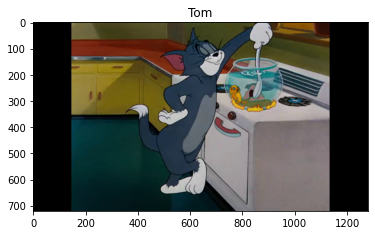

In [ ]:
img = plt.imread(base_dir+'test61.jpg')   # reading image using its name
plt.imshow(img)
plt.title('Tom' if predictions[61] == 2 else 'Jerry'+i)

In [ ]:
width=5
height=5
rows = 12
cols = 12
axes=[]
fig=plt.figure()

for i in range(rows*cols):
    b = np.random.randint(7, size=(height,width))
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(predictions[])
    axes[-1].set_title(subplot_title)  
    plt.imshow(b)
fig.tight_layout()    
plt.show()